In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt 

from collections import Counter

import itertools

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble._forest import ForestClassifier, ForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix

In [2]:
import pandas as pd
from collections import Counter
import itertools

# Load the csv file

dataframe = pd.read_csv("Fraud (1).csv")
dataframe.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [4]:
dataframe["type"].describe()

count      1048575
unique           5
top       CASH_OUT
freq        373641
Name: type, dtype: object

In [5]:
dataframe['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [6]:
type(dataframe['type'])

pandas.core.series.Series

In [7]:
dataframe.isnull().values.any()

False

In [8]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt 

from collections import Counter

import itertools

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble._forest import ForestClassifier, ForestRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier 

from sklearn.metrics import accuracy_score

from sklearn.metrics import precision_score

from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix

In [9]:
non_fraud = len(dataframe[dataframe.isFraud == 0])
fraud = len(dataframe[dataframe.isFraud == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  1047433
Number of Fraud transactions:  1142
Percentage of Fraud transactions: 0.1089


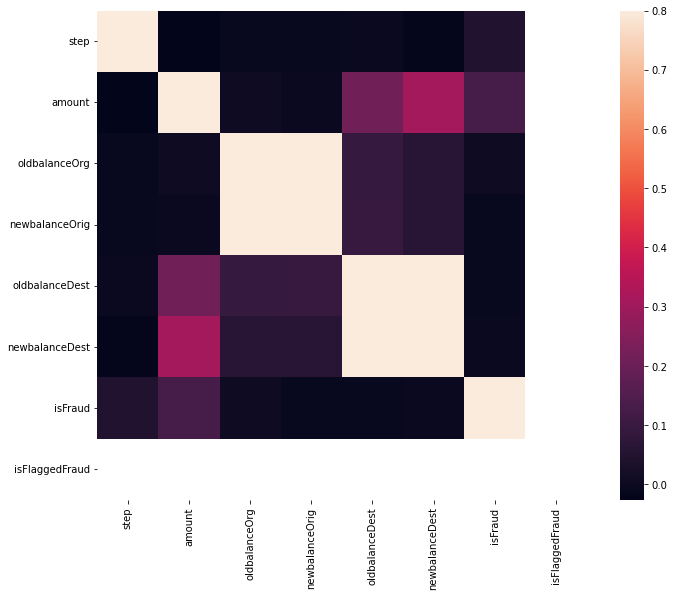

In [10]:
# Correlation matrix
import seaborn as sns
corrmat = dataframe.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


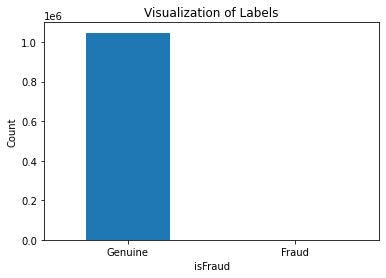

In [11]:
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()


Detecting the outliers

    Visualization

    Using Box Plot



C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

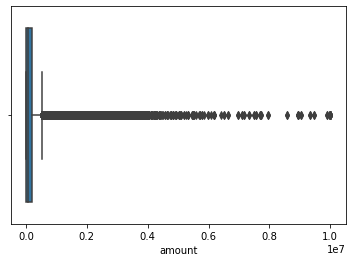

In [12]:
# Box Plot
import seaborn as sns
sns.boxplot(dataframe['amount'])


In the above graph, can clearly see that values above 0.8 are acting as the outliers.

Using ScatterPlot.

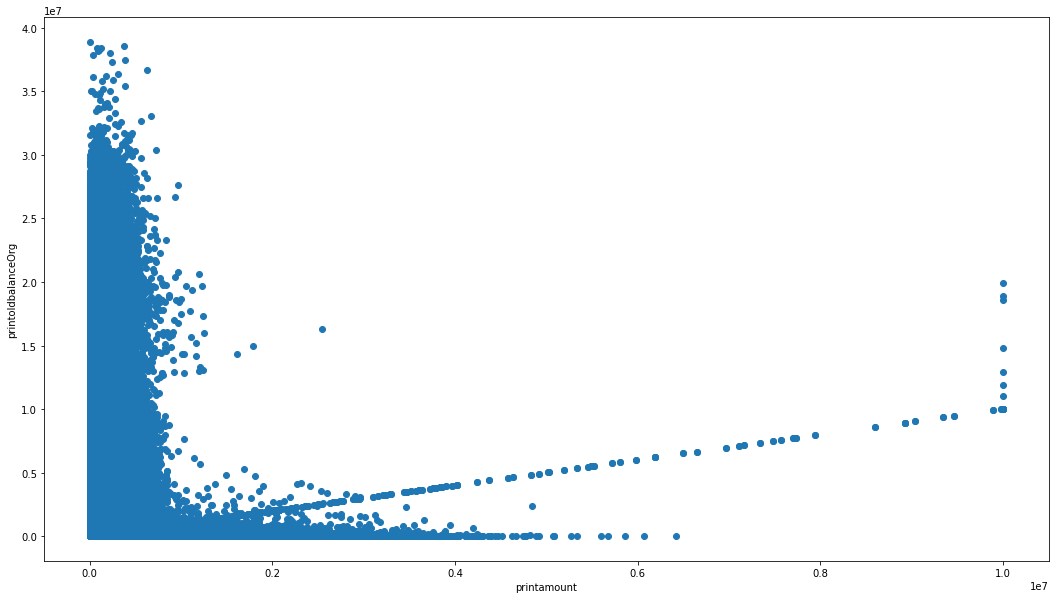

In [13]:
# Scatter plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(dataframe['amount'], dataframe['oldbalanceOrg'])

# x-axis label
ax.set_xlabel('printamount')

# y-axis label
ax.set_ylabel('printoldbalanceOrg')
plt.show()


Looking at the graph can summarize that most of the data points are in the bottom left corner of the graph but there are few points that are exactly;y opposite that is the middle right corner of the graph. Those points in the middle right corner can be regarded as Outliers.

In [14]:
''' Detection '''
# IQR
Q1 = np.percentile(dataframe['amount'], 25,
				interpolation = 'midpoint')

Q3 = np.percentile(dataframe['amount'], 75,
				interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", dataframe.shape)

# Upper bound
upper = np.where(dataframe['amount'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(dataframe['amount'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
dataframe.drop(upper[0], inplace = True)
dataframe.drop(lower[0], inplace = True)

print("New Shape: ", dataframe.shape)


Old Shape:  (1048575, 11)
New Shape:  (995487, 11)


In [15]:
pip install statsmodels

In [16]:
#multicollinear
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X2 = dataframe[['amount', 'newbalanceOrig', 'oldbalanceOrg']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X2.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X2.values, i)
						for i in range(len(X2.columns))]

print(vif_data)


          feature          VIF
0          amount     1.160398
1  newbalanceOrig  1198.666021
2   oldbalanceOrg  1193.364923


In [17]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["amount"].values.reshape(-1, 1))
dataframe.drop(["amount", "nameOrig", "nameDest", "step"], inplace= True, axis= 1)
Y = dataframe["isFraud"]
Xx = dataframe.drop(["isFraud"], axis= 1)

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

X = pd.get_dummies(Xx, columns=['type'], prefix = "type", prefix_sep="_") 
X

,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,NormalizedAmount,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,170136.00,160296.36,0.00,0.00,0,-0.836840,0,0,0,1,0
1,21249.00,19384.72,0.00,0.00,0,-0.900739,0,0,0,1,0
2,181.00,0.00,0.00,0.00,0,-0.914226,0,0,0,0,1
3,181.00,0.00,21182.00,0.00,0,-0.914226,0,1,0,0,0
4,41554.00,29885.86,0.00,0.00,0,-0.822190,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,479803.00,347245.65,484329.37,616886.72,0,0.146379,0,1,0,0,0
1048571,90545.00,80627.64,0.00,0.00,0,-0.836218,0,0,0,1,0
1048572,20545.00,6404.95,0.00,0.00,0,-0.802385,0,0,0,1,0
1048573,90605.00,80584.95,0.00,0.00,0,-0.835395,0,0,0,1,0


In [19]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (696840, 11)
Shape of test_X:  (298647, 11)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Decision Tree
decision_tree = DecisionTreeClassifier()

# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

In [21]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100


In [22]:
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100


In [23]:
print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  99.96450659139386
Decision Tree Score:  99.95714003489068


In [24]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score


def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [25]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix - Decision Tree
[[298380     53]
 [    75    139]]


In [26]:
# from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(confusion_matrix_dt, labels=[0, 1], title= "Confusion Matrix - Decision Tree")

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


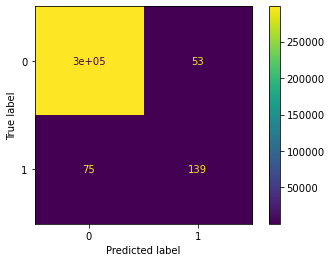

In [27]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(decision_tree, test_X, test_Y)  
plt.show()

In [28]:
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99957
Precision: 0.72396
Recall: 0.64953
F1-score: 0.68473


In [29]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)


Confusion Matrix - Random Forest
[[298430      3]
 [   103    111]]


In [30]:
#plot_confusion_matrix(confusion_matrix_rf, classes=[0, 1], title= "Confusion Matrix - Random Forest")

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


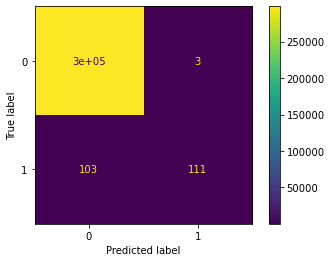

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(random_forest, test_X, test_Y)  
plt.show()

In [32]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99965
Precision: 0.97368
Recall: 0.51869
F1-score: 0.67683


# Address the Class-Imbalance issue

The Random Forest model works better than Decision Trees. But, if we observe our dataset suffers a serious problem of class imbalance. The genuine (not fraud) transactions are more than 99% with the credit card fraud transactions constituting 0.10%.

With such a distribution, if we train our model without taking care of the imbalance issues, it predicts the label with higher importance given to genuine transactions (as there is more data about them) and hence obtains more accuracy.so i do sampling with SMOTE Technique.

In [33]:
from imblearn.over_sampling import SMOTE

X_resampled, Y_resampled = SMOTE().fit_resample(X, Y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.3, random_state= 42)


Resampled shape of X:  (1989616, 11)
Resampled shape of Y:  (1989616,)
Counter({0: 994808, 1: 994808})


In [34]:
rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

In [35]:
cm_resampled = confusion_matrix(test_Y, predictions_resampled.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)


Confusion Matrix - Random Forest
[[298091    498]
 [    71 298225]]


#plot_confusion_matrix(cm_resampled, classes=[0, 1], title= "Confusion Matrix - Random Forest After Oversampling")

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


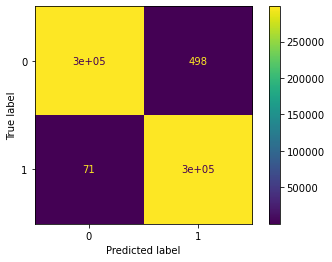

In [36]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf_resampled, test_X, test_Y)  
plt.show()

In [37]:
print("Evaluation of Random Forest Model")
print()

metrics(test_Y, predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.99905
Precision: 0.99833
Recall: 0.99976
F1-score: 0.99905


Now, it is clearly evident that our model performed much better than our previous Random Forest classifier without oversampling.

Summary

In this python machine learning project, we built a binary classifier using the Random Forest algorithm to detect credit card fraud transactions. Through this project, we understood and applied techniques to address the class imbalance issues and achieved an accuracy of more than 99%.

In [38]:
df1 = pd.merge(X_resampled, Y_resampled, right_index=True, left_index=True)
print (df1)

         oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest  \
0        170136.000000       160296.36        0.000000        0.000000   
1         21249.000000        19384.72        0.000000        0.000000   
2           181.000000            0.00        0.000000        0.000000   
3           181.000000            0.00    21182.000000        0.000000   
4         41554.000000        29885.86        0.000000        0.000000   
...                ...             ...             ...             ...   
1989611  401119.090725            0.00     2917.298701   404036.389427   
1989612  112750.081456            0.00        0.000000   112750.081456   
1989613   89765.816736            0.00        0.000000        0.000000   
1989614  353296.812537            0.00        0.000000        0.000000   
1989615  404654.241313            0.00        0.000000        0.000000   

         isFlaggedFraud  NormalizedAmount  type_CASH_IN  type_CASH_OUT  \
0                     0         -0.83

In [39]:
df1.columns

Index(['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'isFlaggedFraud', 'NormalizedAmount', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'isFraud'],
      dtype='object')

In [40]:
##Move last Column to First Column

new_cols = ['isFraud', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'isFlaggedFraud', 'NormalizedAmount', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER']
df3=df1[new_cols]
#or
#df3=df.reindex(columns=new_cols)
print(df3)

         isFraud  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0              0  170136.000000       160296.36        0.000000   
1              0   21249.000000        19384.72        0.000000   
2              1     181.000000            0.00        0.000000   
3              1     181.000000            0.00    21182.000000   
4              0   41554.000000        29885.86        0.000000   
...          ...            ...             ...             ...   
1989611        1  401119.090725            0.00     2917.298701   
1989612        1  112750.081456            0.00        0.000000   
1989613        1   89765.816736            0.00        0.000000   
1989614        1  353296.812537            0.00        0.000000   
1989615        1  404654.241313            0.00        0.000000   

         newbalanceDest  isFlaggedFraud  NormalizedAmount  type_CASH_IN  \
0              0.000000               0         -0.836840             0   
1              0.000000               0      

In [41]:

# Return the feature importances (the higher, the more important the feature).
import pandas as pd

importances = pd.DataFrame({'feature':df3.iloc[:, 1:df3.shape[1]].columns,'importance':np.round(rf_resampled.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
oldbalanceOrg,0.291
newbalanceOrig,0.190
type_PAYMENT,0.114
NormalizedAmount,0.095
type_TRANSFER,0.092
newbalanceDest,0.083
oldbalanceDest,0.063
type_CASH_IN,0.046
type_CASH_OUT,0.023


<AxesSubplot:xlabel='feature'>

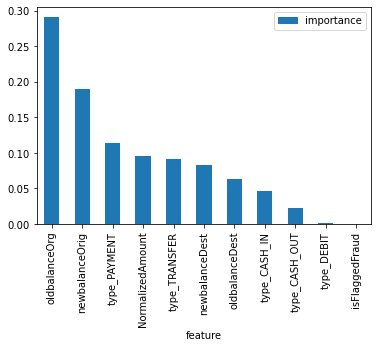

In [42]:
#Visualize the importance
importances.plot.bar()

Conclusion
oldbalanceOrg appears to be the most important feature followed by the newbalanceOrig, type_PAYMENT, and type_PAYMENT. Seeing this result makes me want to see if people with a higher oldbalanceOrg are less likely to be fraud than lower oldbalanceOrg.

Maybe with some more analysis on the data and tweaking of the program, I can improve this models performance and accuracy score.